In [1]:
import numpy as np
import statistics

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def getavg(arr, seeds):
    SUM_arr=[0] * len(arr[0])
    
    for i in range(len(seeds)):
        SUM_arr = [sum(x) for x in zip(SUM_arr, arr[i])]
        
    return np.asarray([x / len(seeds) for x in SUM_arr])
 

In [3]:
def load(opt, types, nn, seeds):

    val_accuracy_arr = []
    sharpness_arr=[]
    
    for seed in seeds:
        with open(opt+"_"+types+"_"+nn+"_seed"+seed+".npy", "rb") as f:
            
            
            train_losses = np.load(f)
            train_accuracy = np.load(f)
            
            if types=='SAM' or types=="base_sharp":
                sharpness = np.load(f)
                sharpness_arr.append(list(sharpness))
                
            val_losses = np.load(f)
            val_accuracy = np.load(f)
            
        
            val_accuracy_arr.append(list(val_accuracy))
            
    sd_list = []
    
    for i in range(len(seeds)):
        sd_list.append(val_accuracy_arr[i][-1])
        
        

    
    EPOCHS =  np.asarray([range(1, len(val_accuracy_arr[0])+1, 1)])
            
    
    if types=='baseline':
        return EPOCHS, getavg(val_accuracy_arr, seeds), getavg(val_accuracy_arr, seeds)[-1], statistics.stdev(sd_list)
    return EPOCHS, getavg(val_accuracy_arr, seeds), getavg(sharpness_arr, seeds), getavg(val_accuracy_arr, seeds)[-1], statistics.stdev(sd_list)
        

In [4]:
def plot(EPOCH_LIST, val_accuracy_SAM, val_accuracy_basesharp, opttype, plottype, nn):
    sns.set()

    plt.plot(EPOCH_LIST, val_accuracy_SAM,"r", label='SAM')
    plt.plot(EPOCH_LIST, val_accuracy_basesharp, "b", label='Baseline')
    plt.xlabel("Epoch")
    if plottype=='Accuracy':
        plt.ylabel("Test "+plottype)
    else:
        plt.ylabel(plottype)
    plt.title(opttype, fontsize=20)
    plt.legend(loc='best')

    plt.savefig(opttype+'_'+nn+'_'+plottype+'_'+'plot.pdf')
    plt.show()

In [5]:
# EPOCHS, val_accuracy, final_mean_val, approx = load("sgd", "baseline", "ResNet18", ["0", "1"])

In [6]:
# final_mean_val

In [7]:
EPOCHS, val_accuracy_SAM, sharpness_SAM, final_mean_val, approx = load("adam", "SAM", "VGG16", ["0", "1", "2"])

In [8]:
print(final_mean_val, approx)

94.12666666666667 0.11239810200058262


In [9]:
EPOCHS, val_accuracy_basesharp, sharpness_basesharp, final_mean_val, approx = load("adam", "base_sharp", "VGG16", ["0", "1", "2"])

In [10]:
print(final_mean_val, approx)

92.17333333333333 0.310053758779565


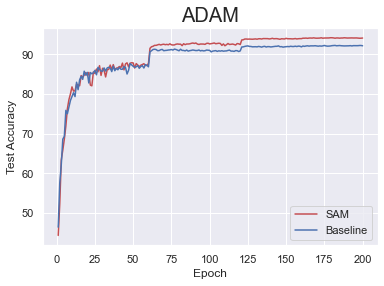

In [11]:
plot(EPOCHS[0], val_accuracy_SAM, val_accuracy_basesharp, "ADAM", "Accuracy", "VGG16")

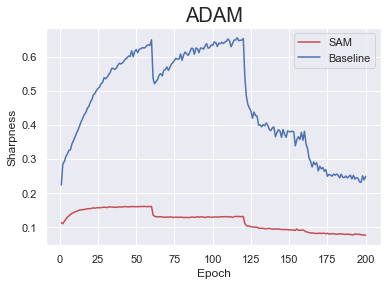

In [12]:
plot(EPOCHS[0], sharpness_SAM, sharpness_basesharp, "ADAM", "Sharpness", "VGG16")